- User Logs in
- Selects the category
- Chooses an image from the category
- Selects the image transformation method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

images = []

Image Transformation Techniques
- Translation
- Reflection
- Rotation
- Cropping
- Sheared image (X or Y)
- Blurring (Gaussian, Median, Bilateral)

In [6]:
#Don't forget some functions would require more than just the image path
#Don't forget that you have not done shearing

def get_images(option):
    img = cv.imread(path, 0)

def translation(img):
    rows, cols = img.shape
    
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img)
    M = np.float32([[1, 0, 100], [0, 1, 50]])
    transl = cv.warpAffine(img, M, (cols, rows))
    
    plt.subplot(1, 2, 2)
    plt.title('Translated Image')
    plt.imshow(transl)
    
    cv.waitKey(0)
    cv.destroyAllWindows()

def reflection(img):
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img)
    
    rows, cols = img.shape
    M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
    reflected_img = cv.warpPerspective(img, M, (int(cols), int(rows)))
    
    plt.subplot(1, 2, 2)
    plt.title('Reflected Image')
    plt.imshow(reflected_img)
    
    cv.waitKey(0)
    cv.destroyAllWindows()
    
def rotation(img):
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img)
    
    rows, cols = img.shape
    
    img_rotation = cv.warpAffine(img, cv.getRotationMatrix2D((cols/2, rows/2),30, 0.6), (cols, rows))
    
    plt.subplot(1, 2, 2)
    plt.title('Rotated Image')
    plt.imshow(img_rotation)
    
    cv.waitKey(0)
    cv.destroyAllWindows()
def cropping(img):
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img)
    
    cropped_img = img[450:700, 200:500]
    
    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cropped_img)
    
    cv.waitKey(0)
    cv.destroyAllWindows()
def shearing(img, option):
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img)

    rows, cols = img.shape
    if(option == 1):
        M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
        sheared_img_x = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
        plt.subplot(1, 2, 2)
        plt.title('Sheared Image')
        plt.imshow(sheared_img_x)
    if(option == 2):
        M = np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])
        sheared_img_y = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
        plt.subplot(1, 2, 2)
        plt.title('Sheared Image')
        plt.imshow(sheared_img_y)
    
def blurring(img, option):
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img)
    
    if (option == 1):
        Gaussian = cv.GaussianBlur(img, (7, 7), 0)
        cv.imshow('Gaussian Blurring', Gaussian)
        cv.waitKey(0)
    if(option == 2):
        median = cv.medianBlur(img, 5)
        cv.imshow('Median Blurring', median)
        cv.waitKey(0)
    if(option == 3):
        bilateral = cv.bilateralFilter(img, 9, 75, 75)
        cv.imshow('Bilateral Blurring', bilateral)
        cv.waitKey(0)
    cv.destroyAllWindows()

In [7]:
artworks = {
    'traditional': {'image_1':'benin_head.jpg', 'image_2':'igbo_ukwu.jpg', 'image_3':'portuguese_soldier.jpg', 'image_4':'traditional_bell.jpg', 'image_5':'unknown.jpg'},
    'modern': {'image_1':'iwin.png', 'image_2':'masks.jpg', 'image_3':'motion_in_space.jpg', 'image_4':'the_dye_pit.jpg', 'image_5':'the_fish.jpg'},
    'contemporary': {'image_1':'ariya.jpg', 'image_2':'common_goal.jpg', 'image_3':'gelede_celebration.jpg', 'image_4':'libation.jpg', 'image_5':'the_bride.jpg'},
}

def get_image(key, artwork):
    img_path = 'img/artworks/' + key + '/' + artwork
    img = cv.imread(img_path,0)
    return img

def category(key):
    for i in artworks[key.strip()]:
        artwork = artworks[key][i]
        img = get_image(key, artwork)
        images.append(img)
    display_image(images)

def display_image(images):
    for i,img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.title(f'Image {i+1}')
        plt.imshow(img)
        plt.axis('off')
        #cv.waitKey(0)
        #cv.destroyAllWindows()
    plt.show()

#category('traditional')

In [8]:
def select_category(number):
    match number:
        case 1:
            category('traditional')
        case 2:
            category('modern')
        case 3: 
            category('contemporary')
        case _:
            print("Invalid choice. Please select a valid category.")

def select_transformation(number, image):
    match number:
        case 1:
            translation(image)
        case 2:
            reflection(image)
        case 3: 
            rotation(image)
        case 4: 
            cropping(image)
        case 5:
            print('Select the shearing direction')
            print('Press 1 for X direction')
            print('Press 2 for Y direction')
            shearing_direction = int(input())
            shearing(image, shearing_direction)
        case 6: 
            print('Select the blurring technique')
            print('Press 1 for Gaussian')
            print('Press 2 for Median')
            print('Press 3 for Bilateral')
            blur_tech = int(input())
            blurring(image, blur_tech)

Welcome to the login page


Username:  1
Password:  2


Welcome 1
Select a category
Press 1 for traditional
Press 2 for modern
Press 3 for contemporary


 1


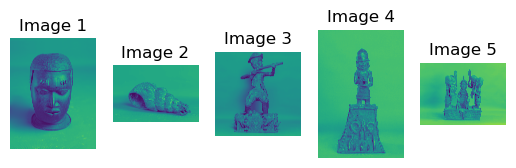

Select a picture
Press 1 for image 1
Press 2 for image 2
Press 3 for image 3
Press 4 for image 4
Press 5 for image 5


 1


Select a transformation technique
Press 1 for translation
Press 2 for reflection
Press 3 for rotation
Press 4 for cropping
Press 5 for shearing
Press 6 for blurring


 6


Select the blurring technique
Press 1 for Gaussian
Press 2 for Median
Press 3 for Bilateral


 1


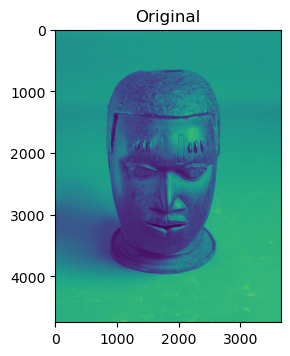

In [10]:
print('Welcome to the login page')
username = input('Username: ')
password = input('Password: ')

print('Welcome '+username)
print('Select a category')
print('Press 1 for traditional')
print('Press 2 for modern')
print('Press 3 for contemporary')

category_choice = int(input())
select_category(category_choice)

print('Select a picture')
print('Press 1 for image 1')
print('Press 2 for image 2')
print('Press 3 for image 3')
print('Press 4 for image 4')
print('Press 5 for image 5')

image_option = int(input())
selected_image = images[image_option - 1]
images.clear()

print('Select a transformation technique')
print('Press 1 for translation')
print('Press 2 for reflection')
print('Press 3 for rotation')
print('Press 4 for cropping')
print('Press 5 for shearing')
print('Press 6 for blurring')

selected_transformation = int(input())
select_transformation(selected_transformation, selected_image)


